# Project File 2
* Continue working on cleaning the data, and solving for other models.

## New Plans
* Clean the data
    - drop null values
    - drop the same columns from before, but also drop the protocol column

In [1]:
import numpy as np 
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot as plt
import seaborn as sns

c:\Users\Hunter\anaconda3\Lib\site-packages\pandas\core\arrays\masked.py:60: UserWarning: Pandas requires version '1.3.6' or newer of 'bottleneck' (version '1.3.5' currently installed).
  from pandas.core import (


In [2]:
df = pd.read_csv('data/project_data.csv')
df.head()

,Flow ID,Source IP,Source Port,Destination IP,Destination Port,Protocol,Timestamp,Flow Duration,Total Fwd Packets,Total Backward Packets,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,192.168.10.5-104.16.207.165-54865-443-6,104.16.207.165,443,192.168.10.5,54865,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,192.168.10.5-104.16.28.216-55054-80-6,104.16.28.216,80,192.168.10.5,55054,6,7/7/2017 3:30,109,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,192.168.10.5-104.16.28.216-55055-80-6,104.16.28.216,80,192.168.10.5,55055,6,7/7/2017 3:30,52,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,192.168.10.16-104.17.241.25-46236-443-6,104.17.241.25,443,192.168.10.16,46236,6,7/7/2017 3:30,34,1,1,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,192.168.10.5-104.19.196.102-54863-443-6,104.19.196.102,443,192.168.10.5,54863,6,7/7/2017 3:30,3,2,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


## Problem with the Dataset
* Every row that is labeled DDoS is TCP
* There are no rows that are UDP that are DDoS

In [3]:
df.columns = df.columns.str.strip() # many columns have preceeding and trailing whitespace in their names. This clears that whitespace.

print(f'Dataframe number of rows    : {len(df)}')
ddos_rows = df[(df['Label'] == 'DDoS')]
tcp_rows = df[(df['Protocol'] == 6)]
udp_rows = df[(df['Protocol'] == 17)]
ddos_tcp_rows = df[(df['Label'] == 'DDoS') & (df['Protocol'] == 6)]
ddos_udp_rows = df[(df['Label'] == 'DDoS') & (df['Protocol'] == 17)]
print(f'Number of rows that are DDoS: {len(ddos_rows)} --> {len(ddos_rows)/len(df)*100:.2f}%')
print(f'Number of rows that are TCP : {len(tcp_rows)} --> {len(tcp_rows)/len(df)*100:.2f}%')
print(f'Number of rows that are UDP : {len(udp_rows)} --> {len(udp_rows)/len(df)*100:.2f}%')
print(f'Number of rows that are TCP and DDoS: {len(ddos_tcp_rows)}')
print(f'Number of rows that are UDP and DDoS: {len(ddos_udp_rows)}')
print('\nCONCERN: All rows labeled DDoS ARE also TCP')



Dataframe number of rows    : 225745
Number of rows that are DDoS: 128027 --> 56.71%
Number of rows that are TCP : 192820 --> 85.41%
Number of rows that are UDP : 32871 --> 14.56%
Number of rows that are TCP and DDoS: 128027
Number of rows that are UDP and DDoS: 0

CONCERN: All rows labeled DDoS ARE also TCP


In [4]:
df.replace([np.inf, -np.inf], np.nan, inplace=True) # There is an infinity value hiding somewhere
print(f'Total number of cells that  are empty: {df.isnull().sum().sum()}')
df.dropna(axis=0, inplace=True)
print(f'New total number of empty cells      : {df.isnull().sum().sum()}')


Total number of cells that  are empty: 68
New total number of empty cells      : 0


In [5]:
#df.drop(columns=['Source IP'], inplace=True)
#df.drop(columns=['Destination IP'], inplace=True)
#df.drop(columns=['Source Port'], inplace=True)
#df.drop(columns=['Destination Port'], inplace=True)
#df.drop(columns=['Flow ID'], inplace=True)
#df.drop(columns=['Timestamp'], inplace=True)     

drop_columns = ['Source IP', 'Destination IP', 'Source Port', 'Destination Port', 'Flow ID', 'Timestamp', 'Protocol']
df.drop(columns=drop_columns, inplace=True)
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label
0,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
1,109,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
2,52,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
3,34,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN
4,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,BENIGN


In [6]:
df['Label_encoded'] = df['Label'].map({'BENIGN': 0, 'DDoS': 1})
df.drop(columns=['Label'], inplace=True)
df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
0,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
1,109,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
2,52,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
3,34,1,1,6,6,6,6,6.0,0.0,6,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0
4,3,2,0,12,0,6,6,6.0,0.0,0,...,20,0.0,0.0,0,0,0.0,0.0,0,0,0


In [7]:
df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
count,2.257110e+05,225711.000000,225711.000000,225711.000000,2.257110e+05,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,...,225711.000000,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,2.257110e+05,225711.000000
mean,1.624410e+07,4.875389,4.573424,939.603147,5.961369e+03,538.615499,27.885810,164.850580,214.939117,2735.990971,...,21.482338,1.848539e+05,1.293631e+04,2.081162e+05,1.776468e+05,1.032370e+07,3.612487e+06,1.288007e+07,7.756523e+06,0.567208
std,3.152612e+07,15.423986,21.756929,3249.628245,3.922122e+04,1864.258043,163.336194,504.927243,797.466898,3705.253860,...,4.166228,7.979819e+05,2.102894e+05,9.002992e+05,7.843163e+05,2.185431e+07,1.275778e+07,2.692283e+07,1.983236e+07,0.495464
min,-1.000000e+00,1.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
25%,7.123800e+04,2.000000,1.000000,26.000000,0.000000e+00,6.000000,0.000000,6.000000,0.000000,0.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000
50%,1.453164e+06,3.000000,4.000000,30.000000,1.640000e+02,20.000000,0.000000,8.666667,5.301991,99.000000,...,20.000000,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000
75%,8.806652e+06,5.000000,5.000000,64.000000,1.160100e+04,34.000000,6.000000,32.000000,10.263203,5840.000000,...,20.000000,1.879000e+03,0.000000e+00,1.879000e+03,1.863000e+03,8.241416e+06,0.000000e+00,8.254452e+06,7.423865e+06,1.000000
max,1.199999e+08,1932.000000,2942.000000,183012.000000,5.172346e+06,11680.000000,1472.000000,3867.000000,6692.644993,11680.000000,...,52.000000,1.000000e+08,3.950000e+07,1.000000e+08,1.000000e+08,1.200000e+08,6.530000e+07,1.200000e+08,1.200000e+08,1.000000


## Normalization
Each column scales drastically. Some have values upward in the millions, and some have values where the mean is only 4.\
Normalization is necessary.

In [8]:
from sklearn.preprocessing import MinMaxScaler

min_max_scaler = MinMaxScaler()
normalized_data = min_max_scaler.fit_transform(df)
normalized_df = pd.DataFrame(normalized_data, columns=df.columns)
normalized_df.head()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
0,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,9.166671e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,4.416669e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2.916668e-07,0.000000,0.00034,0.000033,0.000001,0.000514,0.004076,0.001552,0.0,0.000514,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,3.333335e-08,0.000518,0.00000,0.000066,0.000000,0.000514,0.004076,0.001552,0.0,0.000000,...,0.384615,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [28]:
normalized_df.describe()

,Flow Duration,Total Fwd Packets,Total Backward Packets,Total Length of Fwd Packets,Total Length of Bwd Packets,Fwd Packet Length Max,Fwd Packet Length Min,Fwd Packet Length Mean,Fwd Packet Length Std,Bwd Packet Length Max,...,min_seg_size_forward,Active Mean,Active Std,Active Max,Active Min,Idle Mean,Idle Std,Idle Max,Idle Min,Label_encoded
count,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,...,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000,225711.000000
mean,0.135368,0.002007,0.001555,0.005134,0.001153,0.046114,0.018944,0.042630,0.032116,0.234246,...,0.413122,0.001849,0.000328,0.002081,0.001776,0.086031,0.055321,0.107334,0.064638,0.567208
std,0.262718,0.007988,0.007395,0.017756,0.007583,0.159611,0.110962,0.130573,0.119156,0.317231,...,0.080120,0.007980,0.005324,0.009003,0.007843,0.182119,0.195372,0.224357,0.165270,0.495464
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000594,0.000518,0.000340,0.000142,0.000000,0.000514,0.000000,0.001552,0.000000,0.000000,...,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.012110,0.001036,0.001360,0.000164,0.000032,0.001712,0.000000,0.002241,0.000792,0.008476,...,0.384615,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,0.073389,0.002071,0.001700,0.000350,0.002243,0.002911,0.004076,0.008275,0.001534,0.500000,...,0.384615,0.000019,0.000000,0.000019,0.000019,0.068678,0.000000,0.068787,0.061866,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


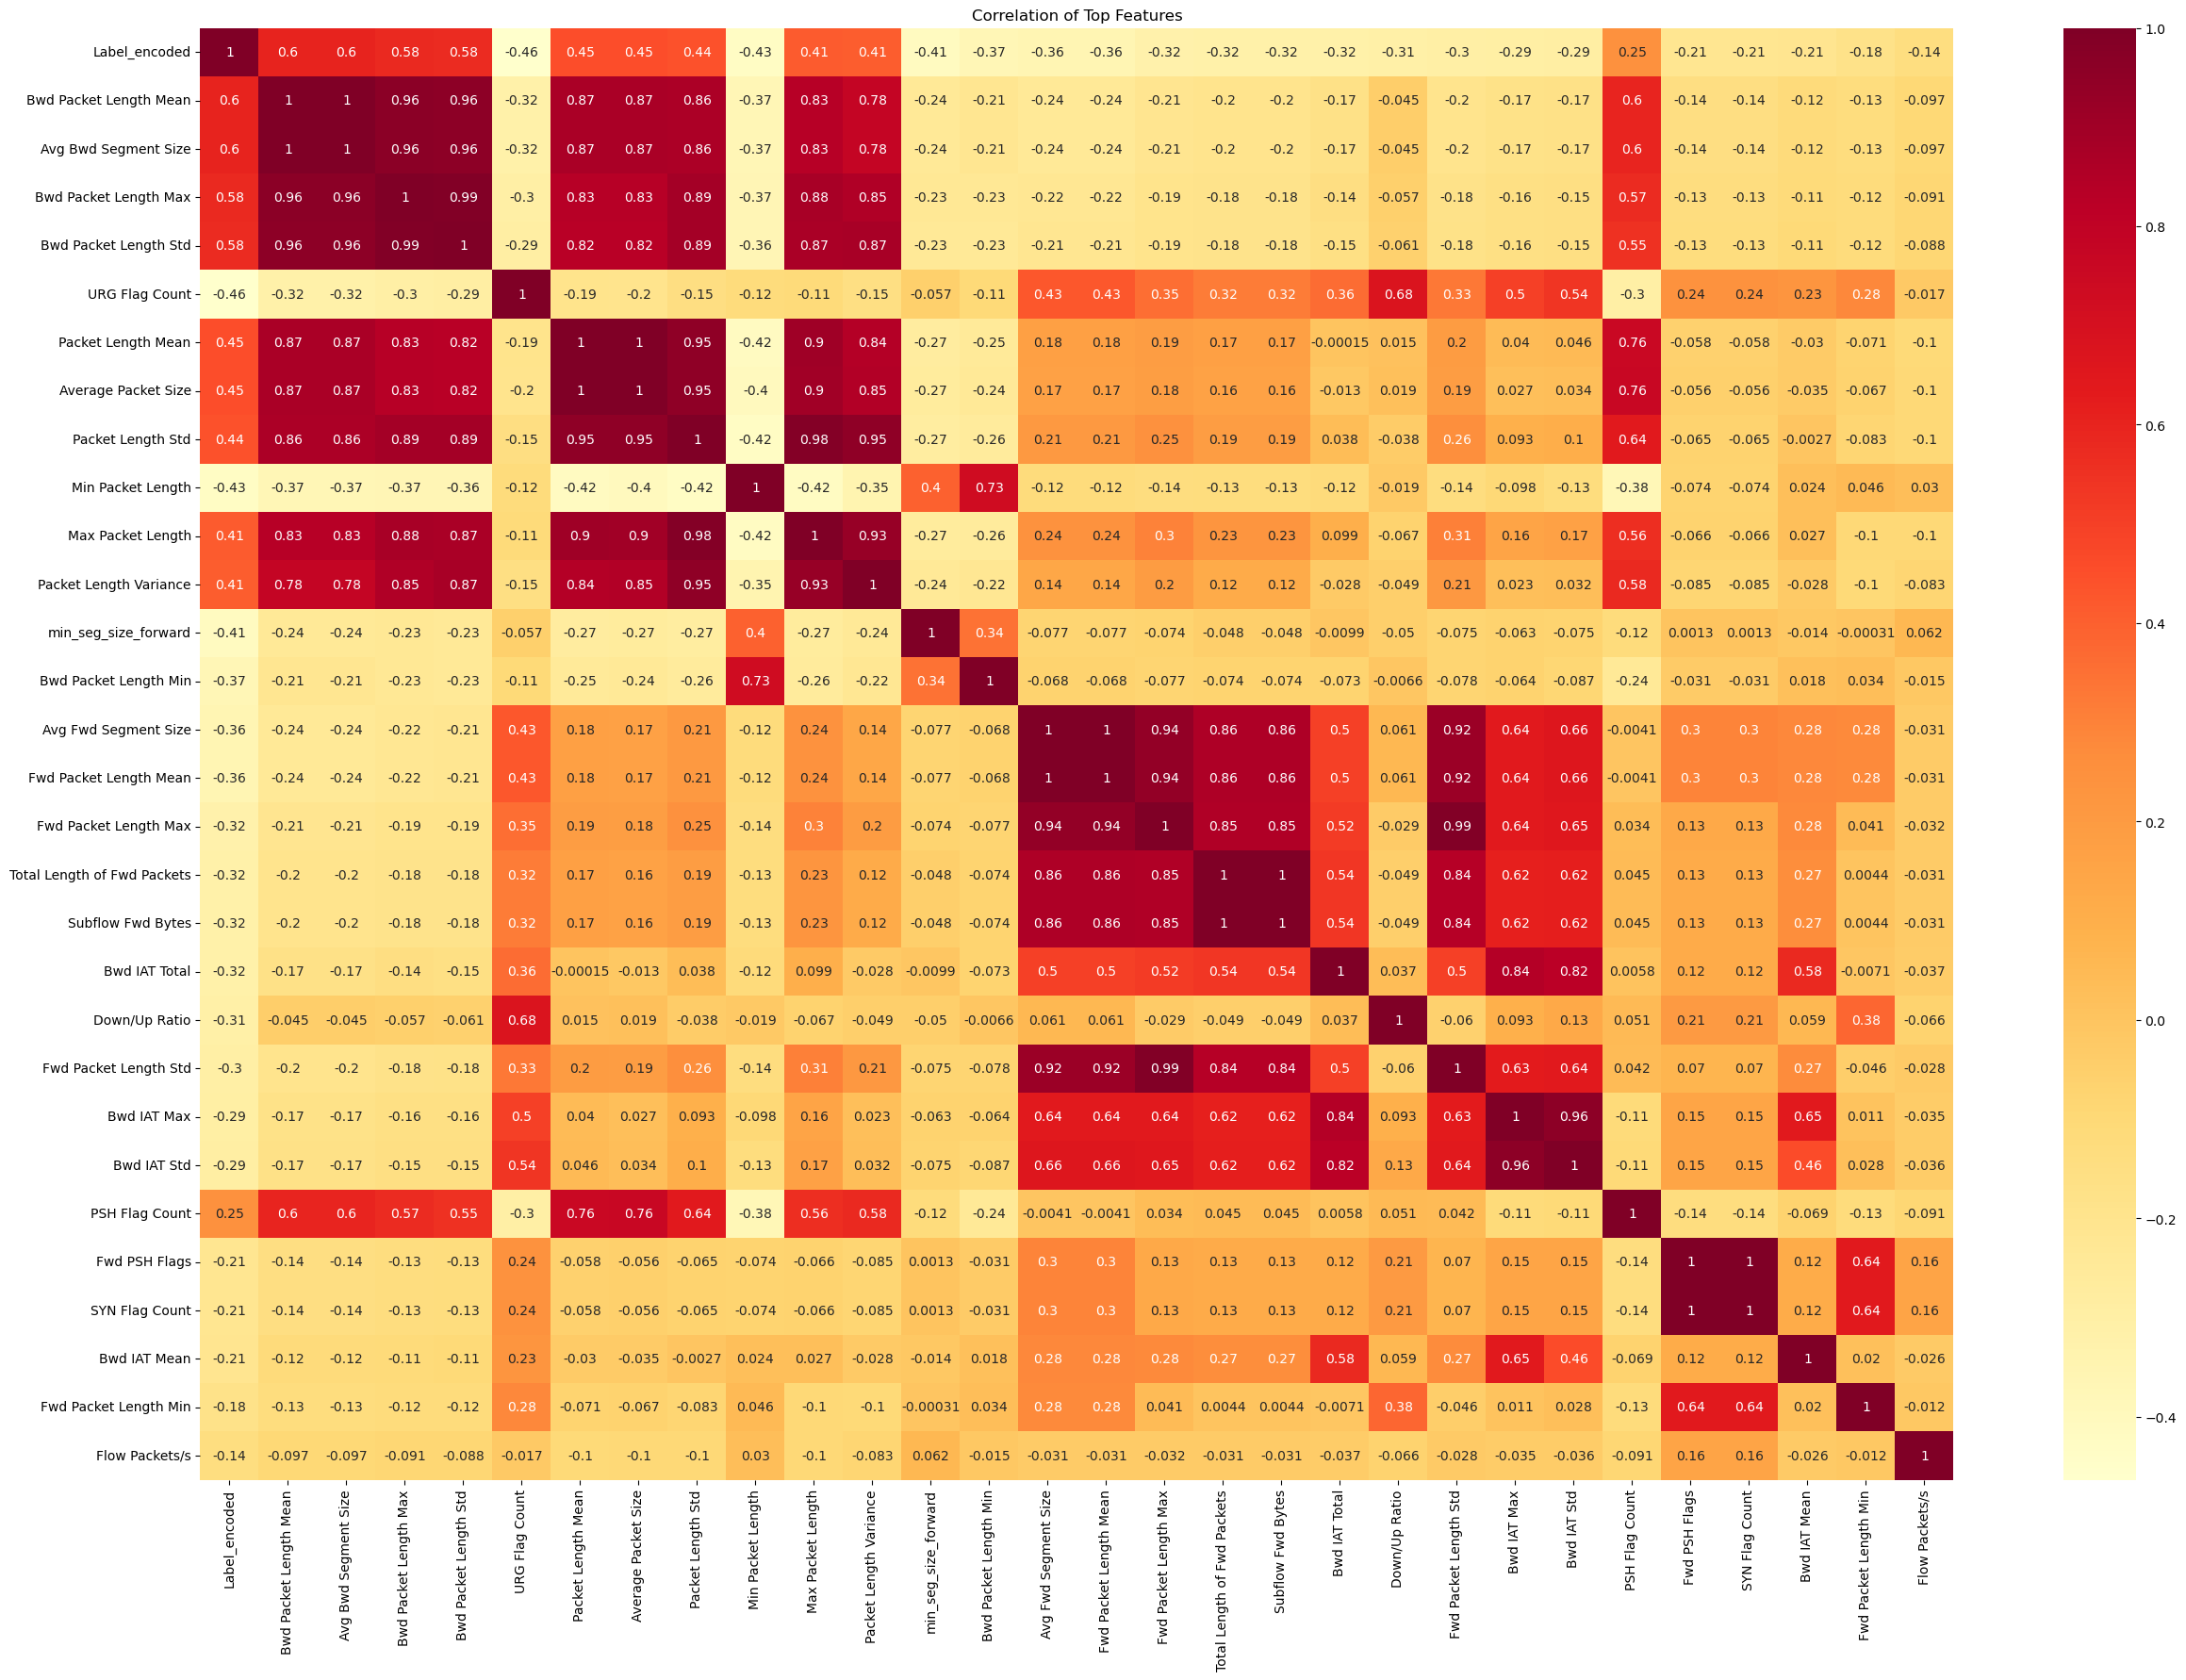

In [29]:
corr_matrix = normalized_df.corr().abs()
top_features = corr_matrix['Label_encoded'].sort_values(ascending=False).head(30).index
top_corr = normalized_df[top_features].corr()

plt.figure(figsize=(30, 20))
sns.heatmap(top_corr, annot=True, cmap='YlOrRd')
plt.title('Correlation of Top Features')
plt.show()

In [30]:
print(top_features)
df_top_features = normalized_df[top_features]

Index(['Label_encoded', 'Bwd Packet Length Mean', 'Avg Bwd Segment Size',
       'Bwd Packet Length Max', 'Bwd Packet Length Std', 'URG Flag Count',
       'Packet Length Mean', 'Average Packet Size', 'Packet Length Std',
       'Min Packet Length', 'Max Packet Length', 'Packet Length Variance',
       'min_seg_size_forward', 'Bwd Packet Length Min', 'Avg Fwd Segment Size',
       'Fwd Packet Length Mean', 'Fwd Packet Length Max',
       'Total Length of Fwd Packets', 'Subflow Fwd Bytes', 'Bwd IAT Total',
       'Down/Up Ratio', 'Fwd Packet Length Std', 'Bwd IAT Max', 'Bwd IAT Std',
       'PSH Flag Count', 'Fwd PSH Flags', 'SYN Flag Count', 'Bwd IAT Mean',
       'Fwd Packet Length Min', 'Flow Packets/s'],
      dtype='object')


In [31]:
y = df_top_features['Label_encoded']
X = df_top_features.drop(columns=['Label_encoded'])
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.20, random_state=42)
print(f'X Shape: {X.shape}')
print(f'y Shape: {y.shape}')

X Shape: (225711, 29)
y Shape: (225711,)


In [32]:
tree_1 = DecisionTreeClassifier(max_depth=1, max_leaf_nodes=5, random_state=42, criterion='gini')
tree_2 = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=10, random_state=42, criterion='gini')
tree_3 = DecisionTreeClassifier(max_depth=5, max_leaf_nodes=15, random_state=42, criterion='gini')
tree_4 = DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42, criterion='gini')

tree_1.fit(Xtrain, ytrain)
tree_2.fit(Xtrain, ytrain)
tree_3.fit(Xtrain, ytrain)
tree_4.fit(Xtrain, ytrain)

DecisionTreeClassifier(max_depth=25, max_leaf_nodes=25, random_state=42)

In [33]:
from sklearn.metrics import mean_squared_error, accuracy_score

y1_pred = tree_1.predict(Xtest)
y2_pred = tree_2.predict(Xtest)
y3_pred = tree_3.predict(Xtest)
y4_pred = tree_4.predict(Xtest)

mse1 = mean_squared_error(ytest, y1_pred)
mse2 = mean_squared_error(ytest, y2_pred)
mse3 = mean_squared_error(ytest, y3_pred)
mse4 = mean_squared_error(ytest, y4_pred)

print(f'MSE 1: {mse1}')
print(f'MSE 2: {mse2}')
print(f'MSE 3: {mse3}')
print(f'MSE 4: {mse4}')

acc1 = accuracy_score(ytest, y1_pred)
acc2 = accuracy_score(ytest, y2_pred)
acc3 = accuracy_score(ytest, y3_pred)
acc4 = accuracy_score(ytest, y4_pred)

print(f'ACC 1: {acc1}')
print(f'ACC 2: {acc2}')
print(f'ACC 3: {acc3}')
print(f'ACC 4: {acc4}')

MSE 1: 0.12735086281372526
MSE 2: 0.001727842633409388
MSE 3: 0.00101898411713887
MSE 4: 0.0007531621735374255
ACC 1: 0.8726491371862747
ACC 2: 0.9982721573665906
ACC 3: 0.9989810158828611
ACC 4: 0.9992468378264626


## Importances
Each model can show which features it used to determine its outputs.\
We can look at this to see if some features are preferred over others.

In [34]:
print(f'Tree 1: {tree_1.feature_importances_}\n')
print(f'Tree 2: {tree_2.feature_importances_}\n')
print(f'Tree 3: {tree_3.feature_importances_}\n')
print(f'Tree 4: {tree_4.feature_importances_}\n')

Tree 1: [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0.]

Tree 2: [0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.57708496 0.42291504 0.
 0.         0.         0.         0.         0.         0.
 0.         0.         0.         0.         0.        ]

Tree 3: [8.56541627e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.35025388e-05 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 5.74885907e-01
 4.22229349e-01 0.00000000e+00 0.00000000e+00 0.00000000e+00
 1.01323632e-04 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.24224910e-03 0.00000000e+00
 6.71126348e-04]

Tree 4: [8.85654507e-04 6.32270552e-05 0.00000000e+00 0.00000000e+00
 3.89121694e-05 2.54132243e-05 2.89984289e-05 0.00000000e+00
 0.00000000e+00 

In [35]:
feature_importances_1 = pd.DataFrame(tree_1.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_1)

                             importance
Fwd Packet Length Max               1.0
Bwd Packet Length Mean              0.0
Fwd Packet Length Min               0.0
Bwd IAT Mean                        0.0
SYN Flag Count                      0.0
Fwd PSH Flags                       0.0
PSH Flag Count                      0.0
Bwd IAT Std                         0.0
Bwd IAT Max                         0.0
Fwd Packet Length Std               0.0
Down/Up Ratio                       0.0
Bwd IAT Total                       0.0
Subflow Fwd Bytes                   0.0
Total Length of Fwd Packets         0.0
Fwd Packet Length Mean              0.0
Avg Bwd Segment Size                0.0
Avg Fwd Segment Size                0.0
Bwd Packet Length Min               0.0
min_seg_size_forward                0.0
Packet Length Variance              0.0
Max Packet Length                   0.0
Min Packet Length                   0.0
Packet Length Std                   0.0
Average Packet Size                 0.0


In [36]:
feature_importances_2 = pd.DataFrame(tree_2.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_2)

                             importance
Fwd Packet Length Max          0.577085
Total Length of Fwd Packets    0.422915
Bwd Packet Length Mean         0.000000
Fwd Packet Length Min          0.000000
Bwd IAT Mean                   0.000000
SYN Flag Count                 0.000000
Fwd PSH Flags                  0.000000
PSH Flag Count                 0.000000
Bwd IAT Std                    0.000000
Bwd IAT Max                    0.000000
Fwd Packet Length Std          0.000000
Down/Up Ratio                  0.000000
Bwd IAT Total                  0.000000
Subflow Fwd Bytes              0.000000
Fwd Packet Length Mean         0.000000
Avg Bwd Segment Size           0.000000
Avg Fwd Segment Size           0.000000
Bwd Packet Length Min          0.000000
min_seg_size_forward           0.000000
Packet Length Variance         0.000000
Max Packet Length              0.000000
Min Packet Length              0.000000
Packet Length Std              0.000000
Average Packet Size            0.000000


In [37]:
feature_importances_3 = pd.DataFrame(tree_3.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_3)

                             importance
Fwd Packet Length Max          0.574886
Total Length of Fwd Packets    0.422229
Bwd IAT Mean                   0.001242
Bwd Packet Length Mean         0.000857
Flow Packets/s                 0.000671
Fwd Packet Length Std          0.000101
URG Flag Count                 0.000014
Packet Length Mean             0.000000
Bwd IAT Total                  0.000000
Fwd Packet Length Min          0.000000
Bwd Packet Length Max          0.000000
SYN Flag Count                 0.000000
Fwd PSH Flags                  0.000000
PSH Flag Count                 0.000000
Bwd IAT Std                    0.000000
Bwd IAT Max                    0.000000
Down/Up Ratio                  0.000000
Subflow Fwd Bytes              0.000000
Average Packet Size            0.000000
Bwd Packet Length Std          0.000000
Avg Bwd Segment Size           0.000000
Avg Fwd Segment Size           0.000000
Bwd Packet Length Min          0.000000
min_seg_size_forward           0.000000


In [38]:
feature_importances_4 = pd.DataFrame(tree_4.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(feature_importances_4)

                             importance
Fwd Packet Length Max          0.574309
Total Length of Fwd Packets    0.421900
Bwd IAT Mean                   0.001241
Flow Packets/s                 0.001051
Bwd Packet Length Mean         0.000886
Bwd IAT Max                    0.000260
Fwd Packet Length Std          0.000101
Bwd Packet Length Min          0.000073
Avg Bwd Segment Size           0.000063
URG Flag Count                 0.000039
Average Packet Size            0.000029
Packet Length Mean             0.000025
Down/Up Ratio                  0.000022
Fwd Packet Length Min          0.000000
Bwd Packet Length Max          0.000000
SYN Flag Count                 0.000000
Fwd PSH Flags                  0.000000
PSH Flag Count                 0.000000
Bwd IAT Std                    0.000000
Subflow Fwd Bytes              0.000000
Bwd IAT Total                  0.000000
Bwd Packet Length Std          0.000000
Avg Fwd Segment Size           0.000000
min_seg_size_forward           0.000000


In [40]:
from sklearn.ensemble import RandomForestClassifier 

forest_1 = RandomForestClassifier()
forest_1.fit(Xtrain, ytrain)
print(forest_1.feature_importances_)

[6.25325558e-02 5.06766719e-02 4.40760476e-02 1.05472505e-02
 2.41869598e-02 1.40010690e-02 6.31557864e-02 2.19863192e-03
 7.68125243e-03 8.80105546e-03 2.37047347e-03 5.87985248e-03
 6.73199061e-02 1.15658625e-01 9.59453148e-02 1.18658502e-01
 1.29024152e-01 9.53907600e-02 7.46045678e-03 2.41451114e-02
 4.72509069e-03 9.06676077e-03 9.76223591e-03 2.43672033e-05
 1.16506640e-05 2.20267004e-04 4.49386815e-03 1.94996468e-03
 2.00353605e-02]


In [42]:
y_pred_forest_1 = forest_1.predict(Xtest)
print(accuracy_score(ytest, y_pred_forest_1))

0.9992025341691957


In [43]:
forest_importances_1 = pd.DataFrame(forest_1.feature_importances_, index = Xtrain.columns, columns=['importance']).sort_values('importance', ascending=False)
print(forest_importances_1)

                             importance
Total Length of Fwd Packets    0.129024
Fwd Packet Length Max          0.118659
Avg Fwd Segment Size           0.115659
Fwd Packet Length Mean         0.095945
Subflow Fwd Bytes              0.095391
Bwd Packet Length Min          0.067320
Average Packet Size            0.063156
Bwd Packet Length Mean         0.062533
Avg Bwd Segment Size           0.050677
Bwd Packet Length Max          0.044076
URG Flag Count                 0.024187
Down/Up Ratio                  0.024145
Flow Packets/s                 0.020035
Packet Length Mean             0.014001
Bwd Packet Length Std          0.010547
Bwd IAT Std                    0.009762
Bwd IAT Max                    0.009067
Max Packet Length              0.008801
Min Packet Length              0.007681
Bwd IAT Total                  0.007460
min_seg_size_forward           0.005880
Fwd Packet Length Std          0.004725
Bwd IAT Mean                   0.004494
Packet Length Variance         0.002370
